# Take-Home Exam 1: NYC Bike Rentals - Data Exploration

In this take-home exam, you are going to investigate bike rentals that took place in NYC. Most of the tasks involve the libraries that you have experienced, such as pandas and matplotlib. In addition, you are going to use `folium` as well, in order to plot spatial distributions.

**Submission Instructions**

---
Copy this assignment to you Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th1`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on your SUCourse submission.


For any question, you may send an email to the TAs and LAs.

---

In [61]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

%matplotlib inline

In [63]:
fname = "NYC-CityBike.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2016-05-31 19:58:48,5/31/2016 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1
1,2016-03-23 11:32:40,3/23/2016 12:06:44,439,E 4 St & 2 Ave,40.726281,-73.989780,319,Fulton St & Broadway,40.711066,-74.009447,18097,Customer,NaN,0
2,2016-05-09 07:31:19,5/9/2016 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1
3,2016-04-17 18:08:30,4/17/2016 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1
4,2016-05-24 21:10:12,5/24/2016 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1


## Data Pre-Processing

#### Datetime Conversion

In the dataframe, the `starttime`, `stoptime` columns are object data types. Convert them to datetime objects as you did in the recitations.

In [0]:
df["starttime"]=pd.to_datetime(df["starttime"])
df["stoptime"]=pd.to_datetime(df["stoptime"])


#### Dealing with NaN values

##### Check NaN Distributions

Show the percentage of NaN values in each column.

*hint: You may check recitation materials.*

In [65]:
(df.isnull().sum() / len(df) )*100

starttime                   0.000000
stoptime                    0.000000
start station id            0.000000
start station name          0.000000
start station latitude      0.000000
start station longitude     0.000000
end station id              0.000000
end station name            0.000000
end station latitude        0.000000
end station longitude       0.000000
bikeid                      0.000000
usertype                    0.000000
birth year                 10.758729
gender                      0.000000
dtype: float64

##### Dropping NaNs

In the following tasks, you will work on age distribution and grouppings. As a result, you need to get rid of NaN age values.

Drop NaN values from the dataframe.


In [171]:
df.head()
df.dropna(subset=["birth year"],inplace=True)
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,agecategorization,day,time_of_week,hour
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30.0,adult,Tuesday,False,19
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35.0,adult,Monday,False,7
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31.0,adult,Sunday,True,18
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56.0,adult,Tuesday,False,21
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42.0,adult,Tuesday,False,21


#### Distance Calculation

Create a new column named `distance` by calculating the distance between starting and ending locations of the bike rents.

You may utilize any library you wish. But we encourage you to use [Geopy](https://pypi.org/project/geopy/) library and its distance functionality.

Please check out the usage of the library from the url provided if you decided to use Geopy.

In [67]:
from geopy.distance import vincenty
distance=[]
startstationlatitude=np.array(df["start station latitude"])
startstationlongitude=np.array(df["start station longitude"])
endstationlat=np.array(df["end station latitude"])
endstationlong=np.array(df["end station longitude"])
for i in range(len(startstationlatitude)):
  newport_ri = (startstationlatitude[i], startstationlongitude[i])
  cleveland_oh = (endstationlat[i], endstationlong[i])
  distance.append(vincenty(newport_ri, cleveland_oh).miles)
df["distance"]=distance
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102


#### Age Distribution

As you may have checked, the age of people who uses bikes in the NYC varies a lot. To analyze this observation further, we can categorize the age of people using bikes. However, before doing that it is a good idea to check the age distribution first.

**Now, please perform following tasks.**

1. **Create a function to be applied on the dataframe to extract the age information from given `birth year` column. Then, create a new column called `age` with the information extracted.**
2. **Check age distribution (of column `age`) in a histogram.**
3. **Create your own age categories after observing the age distributions.**
4. **Express your rationale on your age category selection with markdown writing (and please use available formatting options).**

An example category list is given below.

*An example age category list:*
  - *Between 0 and 14 ages, child*
  - *Between 15 and 24 ages, young* 
  - *Between 25 and 64 ages, adult*
  - *For people who are 65+, senior*

In [68]:
def assignage(birth):
  return 2020-birth;

df["age"]=df["birth year"].apply(assignage)
df

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30.0
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35.0
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31.0
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56.0
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84373,2016-03-17 18:10:01,2016-03-17 18:21:10,462,W 22 St & 10 Ave,40.746920,-74.004519,238,Bank St & Washington St,40.736197,-74.008592,23643,Subscriber,1981.0,1,0.770170,39.0
84374,2016-01-08 12:46:03,2016-01-08 12:48:42,174,E 25 St & 1 Ave,40.738177,-73.977387,536,1 Ave & E 30 St,40.741444,-73.975361,22949,Subscriber,1981.0,1,0.249270,39.0
84375,2016-05-02 16:08:22,2016-05-02 16:19:43,293,Lafayette St & E 8 St,40.730287,-73.990765,470,W 20 St & 8 Ave,40.743453,-74.000040,16251,Subscriber,1987.0,1,1.030754,33.0
84376,2016-01-06 17:02:06,2016-01-06 17:08:07,435,W 21 St & 6 Ave,40.741740,-73.994156,492,W 33 St & 7 Ave,40.750200,-73.990931,17342,Subscriber,1967.0,1,0.607815,53.0


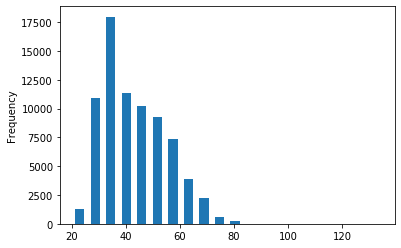

In [69]:
df["age"].plot.hist(rwidth=0.6,bins=20)

#### Age Groups


In order to categorize bike users in terms of their ages, create a function for age categorization called `age_categorize` by referring to the categories and their corresponding age intervals that you explained and justified above. Then, **apply** this function to create a new column in the dataframe called `age_category`.

In [95]:

def agecategorization(age):
  if age <=14:
    return "child"
  elif 15<=age<=24:
    return "young"
  elif 25<=age<=64:
    return "adult"
  else:
    return "senior"
df["agecategorization"]=df["age"].apply(agecategorization)
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,agecategorization,day,time_of_week,hour
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30.0,adult,Tuesday,False,19
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35.0,adult,Monday,False,7
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31.0,adult,Sunday,True,18
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56.0,adult,Tuesday,False,21
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42.0,adult,Tuesday,False,21


## Extracting Insights

#### Distance Distributions

With a histogram, plot the distribution of the `distance` column that you added to the dataframe in the earlier steps.


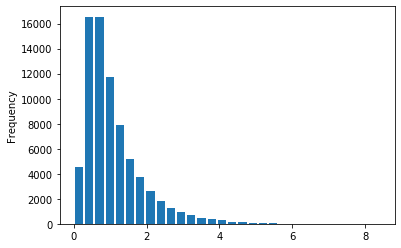

In [71]:
df["distance"].plot.hist(rwidth=0.8,bins=30)

#### Observation Regarding Distances

Does something seem odd? Some of the distances between start and end points seem to be 0. This should be the cases where people leaving the bikes to the same station where they rent them. 

To make sure, 
1. Please find those cases by showing the total counts of rows where the starting and ending stations are same.
2. Plot those cases against rentals do not start and end in same stations in a bar chart.

*(You can also utilize the id of these bike rental stations.)*

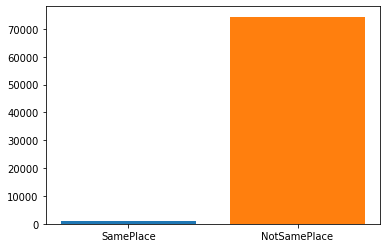

In [176]:
samelatitude=df.loc[(df['start station latitude'] == df['end station latitude'] ) & (df['start station longitude'] == df['end station longitude'])]
b=len(samelatitude)
a=len(df)-b
plt.bar("SamePlace",b)
plt.bar("NotSamePlace",a)

plt.show()


#### Rentals in Weekdays vs. Weekends

Since we have the date information for the bike rentals, by utilizing the functionality of the `datetime` library we can obtain the day information from the `starttime` and `stoptime`.

Now, your tasks are following:
  
  - Extract the day of week (Monday, Tuesday, etc.) information from `starttime` column and create a new column in the dataframe called `day`
  - Using this column, create a new column called `time_of_week`, which shows if the `day` value is in weekdays are in weekend days.
  - Create another column named `hour` by extracting the hour attribute from start time. 
  - Then, with these columns, show the average bike rental amounts per hour for weekdays and weekends in the same figure with line charts.

Please check the documentation of the [date objects](https://docs.python.org/3/library/datetime.html#datetime.date) in the datetime library from the link provided.

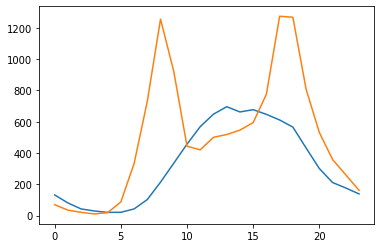

In [191]:
df.head()
df["day"]=df["starttime"].dt.weekday_name;
df["time_of_week"]=df["starttime"].dt.weekday>4
weekend=df[df["time_of_week"]==True]
weekdays=df[df["time_of_week"]==False]
df["hour"]=df["starttime"].dt.hour;
df.head()
a=weekend.groupby("hour").size()
b=weekdays.groupby("hour").size()
a
plt.plot(a/2)
plt.plot(b/5)



#### Age Distributions by Gender

In our original data, gender information was mapped as follows:

    - 0: unknown
    - 1: male
    - 2: female

Use this information to display the age distributions of male and female bike users in different graphs. To do that, please use **matplotlib**'s `subplots` option to create 2 graphs located in the same row.

(array([ 440., 3665., 5076., 2301., 2230., 1672., 1411.,  439.,   98.,
          26.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <a list of 10 Patch objects>)

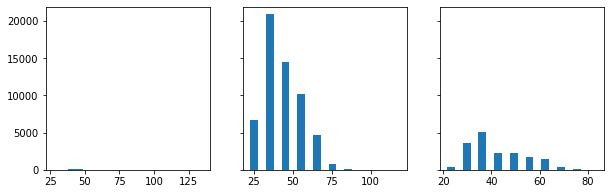

In [183]:
bilinmeyen=df[df["gender"]==0]
erkek=df[df["gender"]==1]
kadin=df[df["gender"]==2]
fig,axs=plt.subplots(1,3,figsize=(10,3),sharey=True)
axs[0].hist(bilinmeyen["age"])
axs[1].hist(erkek["age"],rwidth=0.5)
axs[2].hist(kadin["age"],rwidth=0.5)

In [116]:
df.groupby(by=["agecategorization"]).mean()

,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,distance,age,time_of_week,hour
agecategorization,,,,,,,,,,,,,
adult,863.805530,40.737359,-73.986919,840.334491,40.737150,-73.987094,19851.831272,1978.043661,1.230916,1.077002,41.956339,0.207843,13.831003
senior,793.684670,40.739103,-73.988916,773.176214,40.738992,-73.988911,19737.479542,1950.441353,1.180578,1.046285,69.558647,0.197763,13.591926
young,709.738971,40.732665,-73.990373,696.357843,40.731974,-73.990738,20155.281863,1996.936275,1.221814,0.886509,23.063725,0.203431,14.088235


In [130]:
adult=df[df["agecategorization"]=="adult"]
senior=df[df["agecategorization"]=="senior"]
young=df[df["agecategorization"]=="young"]
senior.starttime.dt.date
adult.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,agecategorization,day,time_of_week,hour
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30.0,adult,Tuesday,False,19
2,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35.0,adult,Monday,False,7
3,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31.0,adult,Sunday,True,18
4,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56.0,adult,Tuesday,False,21
5,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42.0,adult,Tuesday,False,21


#### Usage by Age Groups

Write a function that will display the usage of bike rental system by different age groups in a pie chart *for a given time interval*. For this taks, the first step is provided for you, please complete the implementation of the function 
 `age_groups_in_time_intervals`. The function will take two datetime parameters for `starttime` values and will show age group ratios in pie chart.

In [0]:
# your code
def age_groups_in_time_intervals(time1, time2,df):
  # TO-DO: complete the implementation
  adultx=df[df["agecategorization"]=="adult"]
  senior=df[df["agecategorization"]=="senior"]
  young=df[df["agecategorization"]=="young"]
  a=pd.to_datetime(time1).date()
  b=pd.to_datetime(time2).date()
  adultx=adultx[(b>adultx["starttime"].dt.date) & (a<adultx["starttime"].dt.date)]
  senior=senior[(b>senior["starttime"].dt.date) & (a<senior["starttime"].dt.date)]
  young=young[(b>young["starttime"].dt.date) & (a<young["starttime"].dt.date)]
  plt.pie([ len(adultx), len(senior), len(young)], explode=(0, 0 , 0 ), labels=['Young', 'Adult', 'Senior'],autopct='%1.2f%%', startangle=30)
  plt.title('Ratios of usage by Age Groups between ' + time1  + ' and ' + time2)
  plt.show()

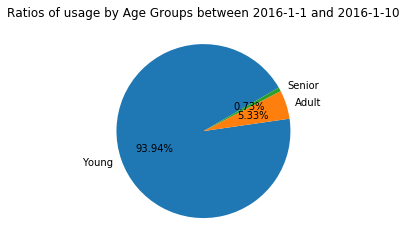

In [236]:
age_groups_in_time_intervals('2016-1-1', '2016-1-10', df)

#### Age Groups vs Distance 

Similar to the task above, we can also investigate the variance of distance between age groups. Plot histograms of distances in each age group in a juxtaposed 1x3 layout.

(array([266., 320., 123.,  58.,  21.,  10.,  11.,   3.,   1.,   3.]),
 array([0.        , 0.51401641, 1.02803283, 1.54204924, 2.05606565,
        2.57008207, 3.08409848, 3.59811489, 4.11213131, 4.62614772,
        5.14016413]),
 <a list of 10 Patch objects>)

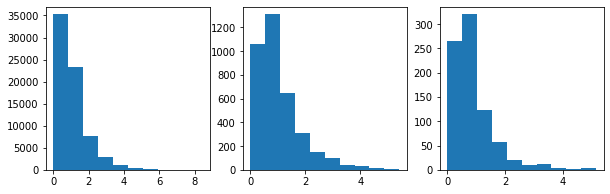

In [146]:
adultx=df[df["agecategorization"]=="adult"]
senior=df[df["agecategorization"]=="senior"]
young=df[df["agecategorization"]=="young"]
fig,axs=plt.subplots(1,3,figsize=(10,3))
axs[0].hist(adultx["distance"])
axs[1].hist(senior["distance"])
axs[2].hist(young["distance"])


## Spatial Visualizations

In this section, you are going to utilize the latitude and longitude values associated with bike rentals and visualize them on a real-world map. 

#### Bike Stations in NYC

From all locations (latitude, longitude pairs) in start and end stations, extract the unique ones and display them as circle markers on the map.

In [189]:
import folium

uniqueinfostart=df[['start station latitude', 'start station longitude']]
uniqueinfostart.drop_duplicates(inplace=True)
uniqueinfo.head()

maxstartlat=df['start station latitude'].max()
maxstartlong=df["start station longitude"].max()
ourmap=folium.Map(location=[maxstartlat,maxstartlong])
ourmap
for k,value in uniqueinfostart.iterrows():
  lat=value['start station latitude']
  long=value['start station longitude']
  folium.CircleMarker(
    location=[lat, long],
    color='yellow',
    fill=True,
    fill_color='yellow'
    ).add_to(ourmap)
ourmap
uniqueinfoend=df[['end station latitude', 'end station longitude']]
uniqueinfoend.drop_duplicates(inplace=True)
uniqueinfoend.head()
for k, value in uniqueinfoend.iterrows():
  
  
  lat = value['end station latitude']
  long = value['end station longitude']

  folium.CircleMarker(
    location=[lat, long],
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(ourmap)

ourmap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Heatmap of Rentals

Extract the latitude and longitude values of rental start locations and display their heatmap. 

In order to generate a heatmap, you may use the link below.

https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap

In [187]:
from folium import plugins
ana=uniqueinfostart.as_matrix()
plugins.HeatMap(ana).add_to(ourmap)
ourmap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
